<a href="https://colab.research.google.com/github/JohnEaganFS/CSCI191T/blob/main/CSCI191TMLLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries for plotting

In [ ]:
!pip install ipympl
!pip install plotly

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [ ]:
# Data
noNoise = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
Noise = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]

In [ ]:
# The data and function that is being modeled
Weights = [5, 2] # F(X) = 5x_0 + 2x_1
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

dataX1 = range(-2, 11, 1)
dataX0 = [1]*len(dataX1)

data = (list(zip(dataX0, dataX1)))
print (data)
Y = [F(Weights, X) for X in data]
print (Y)

[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


## No Noise

In [ ]:
# Setting up the data and X/Y values
data = noNoise
print(data)
X = [d for d,_ in data]
Y = [y for _, y in data]
print(X)
print(Y)

[((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


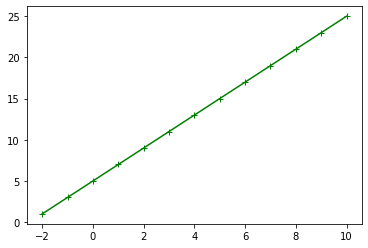

In [ ]:
# Plotting the data with no noise (perfectly matches)
plt.plot(dataX1, Y, "g+")
plt.plot(dataX1, Y, "g")
plt.show()

In [ ]:
# Initial model
alpha=0.01
model=[0, 0]
Errors = []

In [ ]:
# Calculate Predicted Y values based on model weights
yPredicted = [F(model, x) for x in X]
print(yPredicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Evaluate Model
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
print("With Model=", model, "Error=", Error)
Errors.append([model, Error])
print ("History w/ Alpha=", alpha, "=")
print (Errors)
print("Next")
for i in range(len(Errors)):
  print("Iterations=",i+1,":=",Errors[i])

With Model= [0, 0] Error= 2925.0
History w/ Alpha= 0.01 =
[[[0, 0], 2925.0]]
Next
Iterations= 1 := [[0, 0], 2925.0]


In [ ]:
# Calculate derivative of error with respect to weight for each point and then average across all points
deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in zip(Y, yPredicted, X)] )

print(deltaX0)
print(deltaX1)

-26.0
-160.0


In [ ]:
# Update the model by moving each weight according to the slope (negative -> higher weight, positive -> lower weight)
model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
print(model)

[0.26, 1.6]


In [ ]:
# Function for running this process multiple times
def GD(alpha, weights, errors, X, Y, iterations):
  for i in range(iterations):
    yPredicted = [F(weights, x) for x in X]
    print("Predicted Y Values:", yPredicted)

    Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
    print("With Model=", weights, "Error=", Error)
    errors.append([weights, Error])
    
    deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
    deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in zip(Y, yPredicted, X)] )
    print("Delta w0:", deltaX0)
    print("Delta w1:", deltaX1)
    weights = [weights[0]-alpha*deltaX0, weights[1]-alpha*deltaX1]
    print()
  
  print ("History w/ Alpha=", alpha, "=")
  for i in range(len(errors)):
    print("Iterations=",i+1,":=",errors[i])
  return weights

In [ ]:
model = GD(alpha, model, Errors, X, Y, 100)

Predicted Y Values: [-2.9400000000000004, -1.34, 0.26, 1.86, 3.46, 5.0600000000000005, 6.66, 8.26, 9.860000000000001, 11.46, 13.06, 14.66, 16.26]
With Model= [0.26, 1.6] Error= 551.6628
Delta w0: -12.680000000000001
Delta w1: -61.919999999999995

Predicted Y Values: [-4.0516, -1.8323999999999998, 0.38680000000000003, 2.606, 4.8252, 7.0443999999999996, 9.2636, 11.482800000000001, 13.701999999999998, 15.921199999999999, 18.1404, 20.3596, 22.5788]
With Model= [0.38680000000000003, 2.2192] Error= 190.23375696000002
Delta w0: -7.4728
Delta w1: -23.753600000000002

Predicted Y Values: [-4.451943999999999, -1.9952079999999999, 0.46152800000000005, 2.9182639999999997, 5.375, 7.831736, 10.288471999999999, 12.745207999999998, 15.201944, 17.65868, 20.115416, 22.572152, 25.028888]
With Model= [0.46152800000000005, 2.456736] Error= 133.547608044864
Delta w0: -5.423056000000001
Delta w1: -8.903616000000008

Predicted Y Values: [-4.57578576, -2.0300135999999998, 0.5157585600000001, 3.06153072, 5.6073

## Plotting Learned Model Over Data

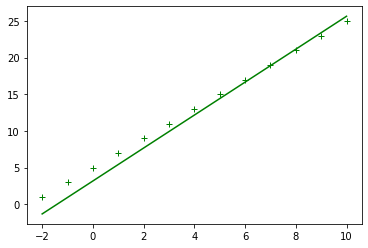

In [ ]:
yPredicted = [F(model, x) for x in X]
dataX1 = [x[1] for x, y in data]
plt.plot(dataX1, yPredicted, "g")
plt.plot(dataX1, Y, "g+")
plt.show()

The model begins to closely represent the original data after 100 iterations. The model performs slightly worse and/or trains slower towards the smaller x values. This could be explained by w0 training slower than w1 because its x values are always 1 where as w1 has x values in the range [-2, 10]. You can even see this reduced learning rate when comparing the delta values for w0 and w1 in the first few iterations.

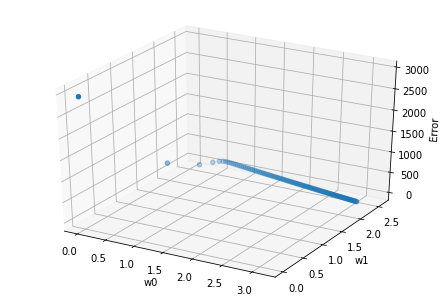

In [ ]:
w0_hist = [x[0][0] for x in Errors]
w1_hist = [x[0][1] for x in Errors]
error_hist = [x[1] for x in Errors]
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel("w0")
plt.ylabel("w1")
ax.set_zlabel("Error")
plot = ax.scatter(w0_hist, w1_hist, error_hist)

This plot shows how the error reduces as w0 and w1 are updated and begin to converge. You may also notice how w0 continues to update long after w1 has converged and the error is minimal. This also shows how w0 is updating and converging slower than w1. This may indicate that different learning rates are needed for each weight depending on the range of their x inputs. I present a possible solution in the "Normalizing the Learning Rate" section at the bottom of this notebook.

In [ ]:
import pandas as pd
tracker = zip(w0_hist, w1_hist, error_hist)
df = pd.DataFrame(tracker, columns=['w0', 'w1', 'Error'])
fig = px.scatter_3d(data_frame=df, x='w0', y='w1', z='Error')
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig.update_layout(scene_camera=camera)
fig.update_traces(marker={'size': 5})
fig.show()

This is an interactive plot you can use to see the data in more detail.

## Noisy Data Set

[((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]
[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[6.39, 16.51, -3.11, 10.79, 11.62, 23.24, 18.27, 27.58, 22.21, 5.12, 8.86, 10.69, 14.82]


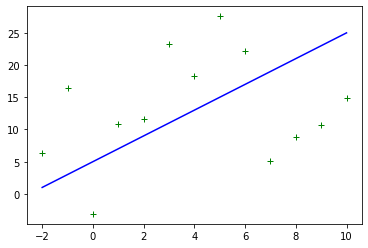

In [ ]:
# This is the noisy data set
data = Noise
print(data)
X = [d for d,_ in data]
Y = [y for _, y in data]
print(X)
print(Y)

plt.plot(dataX1, [y[1] for y in noNoise], "b")
plt.plot(dataX1, Y, "g+")
plt.show()

In [ ]:
# Initial model
alpha=0.03
model=[0, 0]
Errors = []

In [ ]:
# Training the model over 100 iterations
model = GD(alpha, model, Errors, X, Y, 100)

Predicted Y Values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
With Model= [0, 0] Error= 3140.9862999999996
Delta w0: -26.613846153846158
Delta w1: -118.4353846153846

Predicted Y Values: [-6.307707692307691, -2.7546461538461533, 0.7984153846153847, 4.351476923076923, 7.904538461538461, 11.4576, 15.010661538461537, 18.563723076923075, 22.116784615384613, 25.66984615384615, 29.22290769230769, 32.77596923076923, 36.32903076923076]
With Model= [0.7984153846153847, 3.553061538461538] Error= 2621.016120501538
Delta w0: 3.4074769230769206
Delta w1: 101.13563076923074

Predicted Y Values: [-0.34179415384615497, 0.17719846153846108, 0.6961910769230771, 1.215183692307693, 1.7341763076923091, 2.253168923076925, 2.7721615384615412, 3.2911541538461573, 3.8101467692307733, 4.32913938461539, 4.848132000000006, 5.367124615384622, 5.886117230769238]
With Model= [0.6961910769230771, 0.518992615384616] Error= 2249.971682680232
Delta w0: -21.069523076923073
Delta w1: -81.72629907692303

Predicted Y Values: 

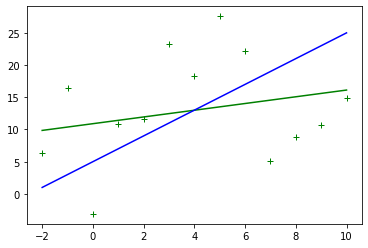

In [ ]:
yPredicted = [F(model, x) for x in X]
dataX1 = [x[1] for x, y in data]
plt.plot(dataX1, yPredicted, "g")
plt.plot(dataX1, Y, "g+")
plt.plot(dataX1, [y[1] for y in noNoise], "b")
plt.show()

As you can see, the model doesn't fit the original data that well because of the noise in the data. Even when you increase the iteration count, the error only approaches around 800. When increasing the learning rate any higher than 0.03, the model begins to diverge.
This shows the importance of having high quality data with little or as minimal noise as possible. Even if there aren't a large amount of points to work with, the quality/accuracy of that data can have a large effect on the final model's performance and trainability.

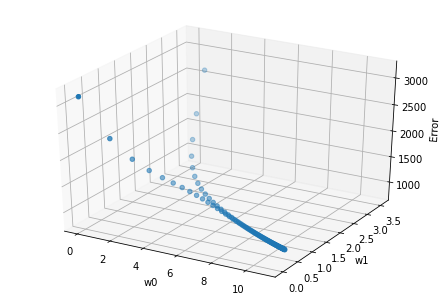

In [ ]:
w0_hist = [x[0][0] for x in Errors]
w1_hist = [x[0][1] for x in Errors]
error_hist = [x[1] for x in Errors]
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel("w0")
plt.ylabel("w1")
ax.set_zlabel("Error")
plot = ax.scatter(w0_hist, w1_hist, error_hist)

This plot shows what happens when our learning rate (alpha) is starting to become too large. The model updates the weights so drastically such that the model bounces back and forth along the two "sides" of the gradient. This isn't necessarily an issue as you can see the values still converge, but this shows that an even higher learning rate would most likely begin to diverge.

In [ ]:
tracker = zip(w0_hist, w1_hist, error_hist)
df = pd.DataFrame(tracker, columns=['w0', 'w1', 'Error'])
fig = px.scatter_3d(data_frame=df, x='w0', y='w1', z='Error')
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig.update_layout(scene_camera=camera)
fig.update_traces(marker={'size': 5})
fig.show()

## Normalizing The Learning Rate

F(X) = w0 * x0 + w1 * x1 + w2 * x2

> For this setup, the function will have three weights. The idea behind "normalizing" the learning rate will be to make sure that each weight is given approximately the same amount of learning to prevent weights with smaller ranges (like w0) from learning slower.



In [ ]:
Weights = [8, 6, 4] # F(X) = 8x_0 + 6x_1 + 4x_2
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

# Note that the ranges of X1 and X2 are much greater than that of X0. This is important later.
dataX2 = range(-10, 11, 1)
dataX1 = range(-10, 11, 1)
dataX0 = [1]*len(dataX1)

X = (list(zip(dataX0, dataX1, dataX2)))
Y = [F(Weights, x) for x in X]
data = zip(X, Y)

print ("X Values:", X)
print ("Y Values:", Y)
print("Points:", list(data))

X Values: [(1, -10, -10), (1, -9, -9), (1, -8, -8), (1, -7, -7), (1, -6, -6), (1, -5, -5), (1, -4, -4), (1, -3, -3), (1, -2, -2), (1, -1, -1), (1, 0, 0), (1, 1, 1), (1, 2, 2), (1, 3, 3), (1, 4, 4), (1, 5, 5), (1, 6, 6), (1, 7, 7), (1, 8, 8), (1, 9, 9), (1, 10, 10)]
Y Values: [-92, -82, -72, -62, -52, -42, -32, -22, -12, -2, 8, 18, 28, 38, 48, 58, 68, 78, 88, 98, 108]
Points: [((1, -10, -10), -92), ((1, -9, -9), -82), ((1, -8, -8), -72), ((1, -7, -7), -62), ((1, -6, -6), -52), ((1, -5, -5), -42), ((1, -4, -4), -32), ((1, -3, -3), -22), ((1, -2, -2), -12), ((1, -1, -1), -2), ((1, 0, 0), 8), ((1, 1, 1), 18), ((1, 2, 2), 28), ((1, 3, 3), 38), ((1, 4, 4), 48), ((1, 5, 5), 58), ((1, 6, 6), 68), ((1, 7, 7), 78), ((1, 8, 8), 88), ((1, 9, 9), 98), ((1, 10, 10), 108)]


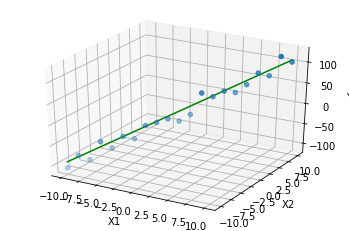

In [ ]:
## Add Noise
import random
import numpy as np
EPS = 50
yNoise = [y+random.random()*EPS-EPS/2 for y in Y]

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(dataX1, dataX2, Y, 'g')
plt.xlabel("X1")
plt.ylabel("X2")
ax.set_zlabel("Y")
ax.scatter(dataX1, dataX2, yNoise)

This 3D plot shows the actual function along with the noisy data that has been generated. Note that this is now a 3D graph because another variable (x2) has been added to the equation.

In [ ]:
import plotly.graph_objects as go
frameNoise = zip(dataX1, dataX2, yNoise)
frameY = zip(dataX1, dataX2, Y)
df = pd.DataFrame(frameNoise, columns=['x1', 'x2', 'Y'])
dfY = pd.DataFrame(frameY, columns=['x1', 'x2', 'Y'])
fig1 = px.scatter_3d(data_frame=df, x='x1', y='x2', z='Y')
fig2 = px.line_3d(data_frame=dfY, x='x1', y='x2', z='Y')
fig3 = go.Figure(data=fig1.data + fig2.data)
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig3.update_layout(scene_camera=camera)
fig3.update_traces(marker={'size': 5})
fig3.show()

In [ ]:
# Our new model contains three weights
alpha=0.001
model=[0, 0, 0]
Errors = []

The function below generalizes the Gradient Descent algorithm to deal with any amount of weights. This doesn't normalize the learning rate quite yet, but gives an idea of what this example looks like without it.

In [ ]:
def GDGeneral(alpha, weights, errors, X, Y, iterations):
  for i in range(iterations):
    yPredicted = [F(weights, x) for x in X]
    print("Predicted Y Values:", yPredicted)

    Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
    print("With Model=", weights, "Error=", Error)
    errors.append([weights.copy(), Error])
    print(errors)
    
    # Derivative function
    D = lambda weights, X, Y, var: 1/len(Y)*sum([(-2*(r-y)*x[var]) for r,y,x in zip(Y, yPredicted, X)])
    for i in range(len(weights)):
      delta = D(weights, X, Y, i)
      weights[i] = weights[i]-alpha*delta
      print("Delta w" + str(i) + ":", delta)
    print()
  
  print ("History w/ Alpha=", alpha, "=")
  for i in range(len(errors)):
    print("Iterations=",i+1,":=",errors[i])
  return weights

In [ ]:
model = GDGeneral(alpha, model, Errors, X, yNoise, 100)
model_basic = Errors[len(Errors)-1]

Predicted Y Values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
With Model= [0, 0, 0] Error= 86110.96597318433
[[[0, 0, 0], 86110.96597318433]]
Delta w0: -6.018686238028005
Delta w1: -760.484797881108
Delta w2: -760.484797881108

Predicted Y Values: [-15.20367727138413, -13.682707675621916, -12.161738079859699, -10.640768484097485, -9.119798888335268, -7.598829292573052, -6.077859696810837, -4.556890101048621, -3.035920505286404, -1.514950909524188, 0.006018686238028005, 1.526988282000244, 3.0479578777624603, 4.568927473524676, 6.0898970692868915, 7.610866665049107, 9.131836260811326, 10.65280585657354, 12.173775452335757, 13.694745048097971, 15.215714643860188]
With Model= [0.006018686238028005, 0.760484797881108, 0.760484797881108] Error= 63601.325003338075
[[[0, 0, 0], 86110.96597318433], [[0.006018686238028005, 0.760484797881108, 0.760484797881108], 63601.325003338075]]
Delta w0: -6.006648865551961
Delta w1: -648.9470275252123
Delta w2: -648.9470275252123

Predi

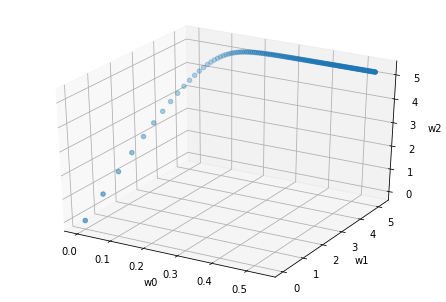

In [ ]:
w0_hist = [x[0][0] for x in Errors]
w1_hist = [x[0][1] for x in Errors]
w2_hist = [x[0][2] for x in Errors]
fig = plt.figure()
ax = Axes3D(fig)
plot = ax.scatter(w0_hist, w1_hist, w2_hist)
plt.xlabel("w0")
plt.ylabel("w1")
ax.set_zlabel("w2")
plt.show()

Once again, w0 struggles to learn as fast as w1 and w2. After 100 iterations, it's only able to get to ~1 when the actual weight is 8.

In [ ]:
tracker = zip(w0_hist, w1_hist, w2_hist)
df = pd.DataFrame(tracker, columns=['w0', 'w1', 'w2'])
fig = px.scatter_3d(data_frame=df, x='w0', y='w1', z='w2')
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig.update_layout(scene_camera=camera)
fig.update_traces(marker={'size': 5})
fig.show()

In [ ]:
yPredicted = [F(model, x) for x in X]
frameModel = zip(dataX1, dataX2, yPredicted)
frameY = zip(dataX1, dataX2, Y)
df = pd.DataFrame(frameModel, columns=['x1', 'x2', 'Y'])
dfY = pd.DataFrame(frameY, columns=['x1', 'x2', 'Y'])
fig1 = px.scatter_3d(data_frame=df, x='x1', y='x2', z='Y')
fig2 = px.line_3d(data_frame=dfY, x='x1', y='x2', z='Y')
fig3 = go.Figure(data=fig1.data + fig2.data)
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig3.update_layout(scene_camera=camera)
fig3.update_traces(marker={'size': 5})
fig3.show()

The model ends up pretty accurate, but the final w0 is still far off from the actual weight and you can see how the back part of the model lags behind the front in terms of convergence.

In [ ]:
error_hist = [x[1] for x in Errors]
tracker = zip(w1_hist, w2_hist, error_hist)
df = pd.DataFrame(tracker, columns=['w1', 'w2', 'Error'])
fig = px.scatter_3d(data_frame=df, x='w1', y='w2', z='Error')
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig.update_layout(scene_camera=camera)
fig.update_traces(marker={'size': 5})
fig.show()

This plot shows how w1 and w2 change as the error decreases.

In [ ]:
# Now we will try training the model with normalization of the learning rate
alpha=0.001
model=[0, 0, 0]
Errors = []

This function attempts to normalize the learning rate for each weight by multiplying the learning rate by the largest range of x values divided by the current weight's range of x values. alpha * (x_range_max / current_x_range)

In [ ]:
XS = [dataX0, dataX1, dataX2]

def GDGeneralNormalized(alpha, weights, errors, X, Y, iterations):
  x_ranges = [max(x) - min(x) + 1 for x in XS]
  x_range_max = max(x_ranges)

  
  for i in range(iterations):
    yPredicted = [F(weights, x) for x in X]
    print("Predicted Y Values:", yPredicted)

    Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
    print("With Model=", weights, "Error=", Error)
    errors.append([weights.copy(), Error])
    print(errors)
    
    D = lambda weights, X, Y, var: 1/len(Y)*sum([(-2*(r-y)*x[var]) for r,y,x in zip(Y, yPredicted, X)])
    for i in range(len(weights)):
      delta = D(weights, X, Y, i)
      weights[i] = weights[i]-alpha*delta*(x_range_max/x_ranges[i])
      print("Delta w" + str(i) + ":", delta)
    print()
  
  print ("History w/ Alpha=", alpha, "=")
  for i in range(len(errors)):
    print("Iterations=",i+1,":=",errors[i])
  return weights

In [ ]:
model = GDGeneralNormalized(alpha, model, Errors, X, yNoise, 100)
model_normalization = Errors[len(Errors)-1]

Predicted Y Values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
With Model= [0, 0, 0] Error= 86110.96597318433
[[[0, 0, 0], 86110.96597318433]]
Delta w0: -6.018686238028005
Delta w1: -760.484797881108
Delta w2: -760.484797881108

Predicted Y Values: [-15.083303546623572, -13.562333950861355, -12.041364355099141, -10.520394759336924, -8.99942516357471, -7.4784555678124915, -5.957485972050276, -4.43651637628806, -2.915546780525844, -1.394577184763628, 0.1263924109985881, 1.6473620067608041, 3.16833160252302, 4.689301198285237, 6.210270794047452, 7.731240389809668, 9.252209985571884, 10.773179581334102, 12.294149177096315, 13.815118772858533, 15.336088368620747]
With Model= [0.1263924109985881, 0.760484797881108, 0.760484797881108] Error= 63586.445393201146
[[[0, 0, 0], 86110.96597318433], [[0.1263924109985881, 0.760484797881108, 0.760484797881108], 63586.445393201146]]
Delta w0: -5.765901416030834
Delta w1: -648.9470275252123
Delta w2: -648.9470275252123

Predicted Y 

If you compare the final weights/error from this training and the previous example, you can see how the model has become slightly more accurate.

In [ ]:
print("Model w/o Normalization:", model_basic)
print("Model with Normalization:", model_normalization)

Model w/o Normalization: [[0.5410581679695161, 5.185122835755703, 5.185122835755703], 3241.366467971118]
Model with Normalization: [[2.9663244363916443, 5.185122835755703, 5.185122835755703], 3113.464288128656]


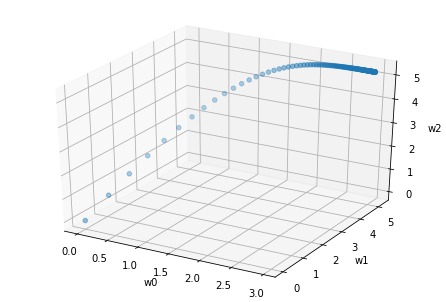

In [ ]:
w0_hist = [x[0][0] for x in Errors]
w1_hist = [x[0][1] for x in Errors]
w2_hist = [x[0][2] for x in Errors]
fig = plt.figure()
ax = Axes3D(fig)
plot = ax.scatter(w0_hist, w1_hist, w2_hist)
plt.xlabel("w0")
plt.ylabel("w1")
ax.set_zlabel("w2")
plt.show()

Compared to before, w0 is updating/converging a lot quicker now without diverging. This seems to have been successful.

In [ ]:
tracker = zip(w0_hist, w1_hist, w2_hist)
df = pd.DataFrame(tracker, columns=['w0', 'w1', 'w2'])
fig = px.scatter_3d(data_frame=df, x='w0', y='w1', z='w2')
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig.update_layout(scene_camera=camera)
fig.update_traces(marker={'size': 5})
fig.show()

In [ ]:
yPredicted = [F(model, x) for x in X]
frameModel = zip(dataX1, dataX2, yPredicted)
frameY = zip(dataX1, dataX2, Y)
df = pd.DataFrame(frameModel, columns=['x1', 'x2', 'Y'])
dfY = pd.DataFrame(frameY, columns=['x1', 'x2', 'Y'])
fig1 = px.scatter_3d(data_frame=df, x='x1', y='x2', z='Y')
fig2 = px.line_3d(data_frame=dfY, x='x1', y='x2', z='Y')
fig3 = go.Figure(data=fig1.data + fig2.data)
camera = dict(eye=dict(x=0.5,y=-2,z=0.5))
fig3.update_layout(scene_camera=camera)
fig3.update_traces(marker={'size': 5})
fig3.show()

The model ends up being closer to the actual function because w0 was able to train faster. This also means that less iterations are required to achieve convergence. You can see how the back of the function still lags behind a little bit which suggests that a slightly higher normalization term may be needed for w0, but it ends up better than without any normalization.